# MACHINE LEARNING MODELS PROJECT

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. 
One of the most common problems gyms and other services face is customer churn. 
In order to fight churn, Model Fitness has digitized a number of its customer profiles. 
Your task is to analyze them and come up with a customer retention strategy.

## Introduction

The purpose of this project is to analyze the gym customer profiles and create a customer retention strategy.
We need to learn to predict the probability of churn for each customer, analyze the factors that impact churn most, identify target groups and make recommendations to combat churn and boost customer retention.


### Contents

- Introduction
- Initialization
- Exploratory Data Analysis
- Build Models to Predict User Churn
    - Linear Regression Model
    - Random Forest Classifier Model
- Create User Clusters using Kmeans
- General Conclusion

## Initialization

In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# reading csv file
gym_data = pd.read_csv('/datasets/gym_churn_us.csv')

## Exploratory Data Analysis

In [3]:
# printing first 5 rows of dataset
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
# general info of dataset
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

There are no missing values in the dataset.

In [5]:
# checking for duplicates in the dataset
gym_data.duplicated().sum()

0

Consequently, there are no obvious duplicates in the dataset.

In [6]:
# change the column names to lowercase
gym_data.columns = gym_data.columns.str.lower()

In [7]:
# check change to column names
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [8]:
# statistics of the data
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


To make analysis easier, we can denote the binary values in the `'gender'` column as **0 for Male** and **1 for Female**. The binary data for the remaining columns are **0 for yes** and **1 for no**.

In [9]:
# statistics of churn data for those who left
# 0 for those who left and 1 for those who stayed
positive_churn = gym_data.query("churn == 0")
positive_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.0
mean,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,0.0
std,0.499984,0.332933,0.498914,0.478144,0.295040,4.716942,0.498795,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021,0.0
50%,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,0.0


Per the statistics above for customers who left the gym, close to 3/4 of the dataset is represented with the mean age being ~30. The average contract period is ~6 months with the average total time spent at the gym noted as ~5 months. The members visited the gym twice weekly on average. The average customer had 5 months left on their contract when they left.

In [10]:
# statistics of churn data for those who stayed
negative_churn = gym_data.query("churn == 1")
negative_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.0
std,0.500118,0.422217,0.478837,0.387495,0.296204,2.132371,0.443448,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337,1.0
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445,1.0
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271,1.0


Here, slightly over a 1000 members stayed loyal to the gym out of th total 4000 in the dataset. The avergae age of cutomers is ~27. The average contract period is 1 month with the average total time spent at the gym noted as ~1 month. The members visit the gym mostly once weekly on average. The average customer has ~2 months left on their contract.

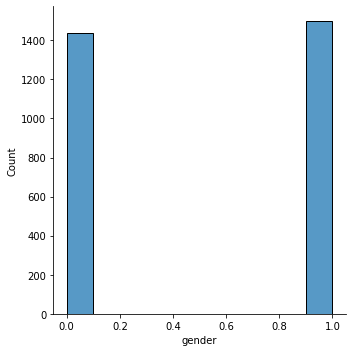

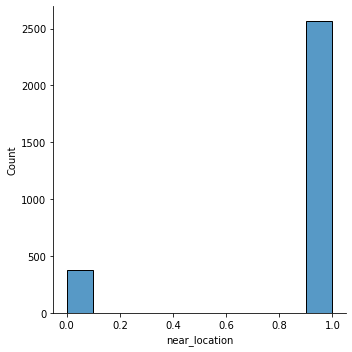

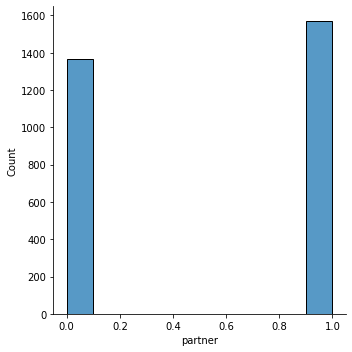

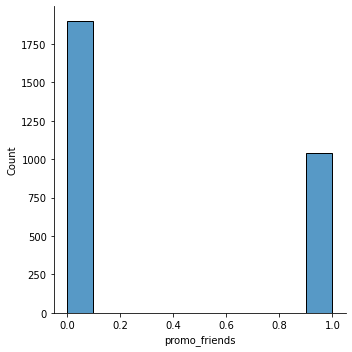

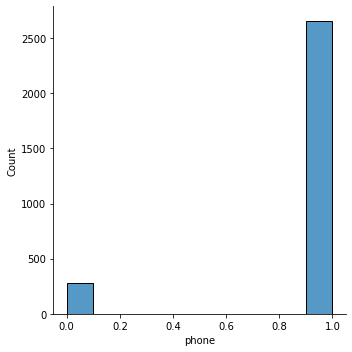

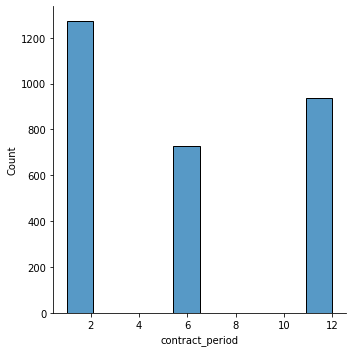

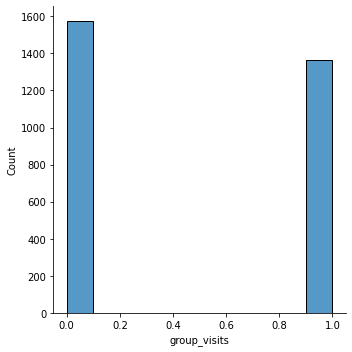

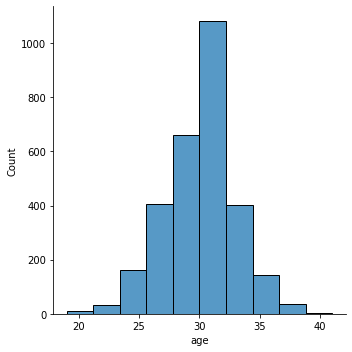

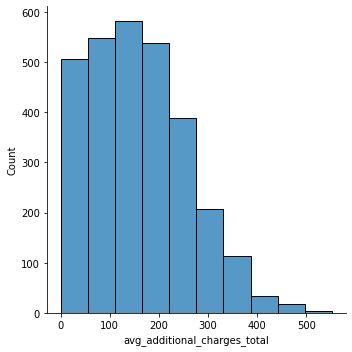

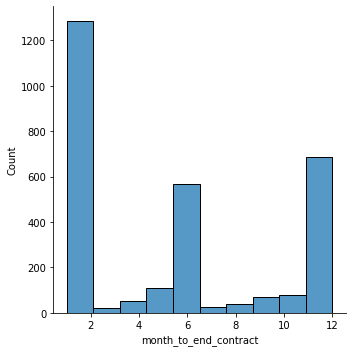

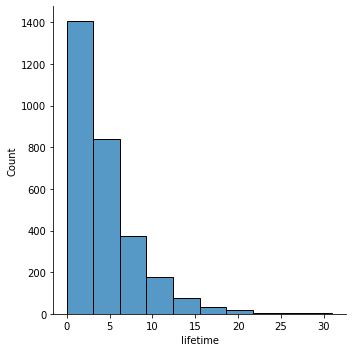

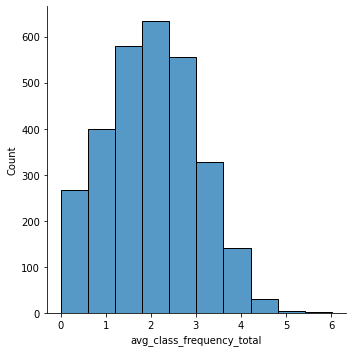

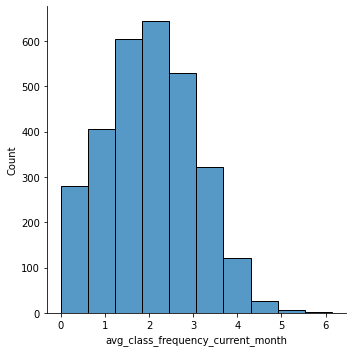

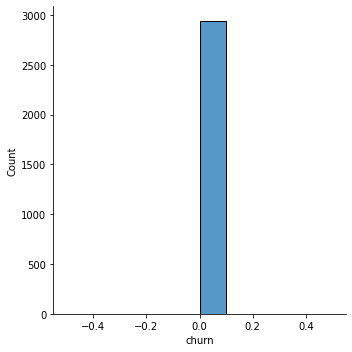

In [11]:
# feature histograms for positive user churn
for feature in positive_churn.columns:
    #plt.figure(figsize = (12,12))
    sns.displot(positive_churn[feature], bins = 10)
    plt.show()

For the customers who left the gym, over 1500 were females(1) and a little over 1400 were males(0). 2500 of the members reside close to the gym. Majority did not have visit with partners though many got in through friend promotions. Majority did not apply with a phone number. Most members are aged in their 30s. Most visited twice weekly and many were new to the gym judging by the lifetime chart.

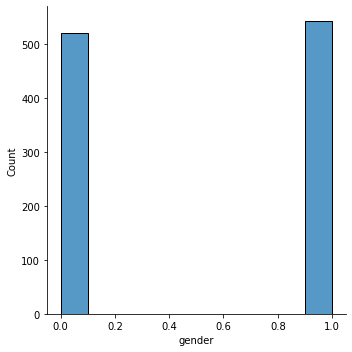

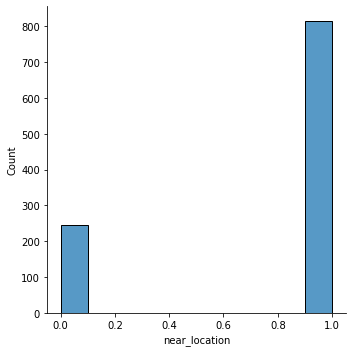

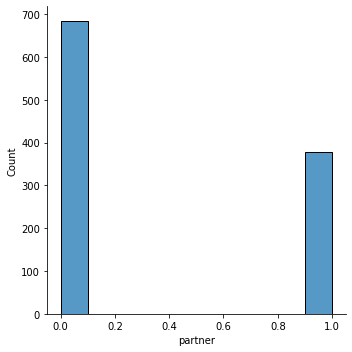

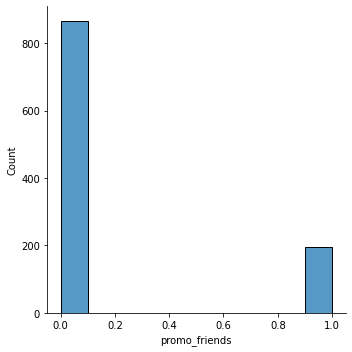

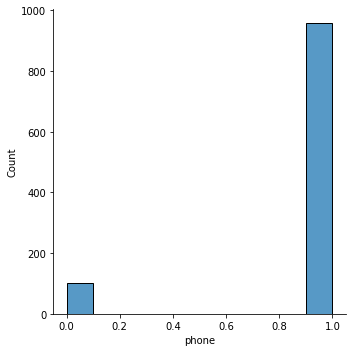

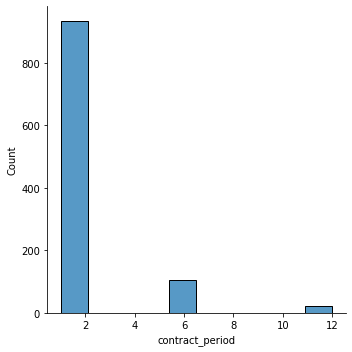

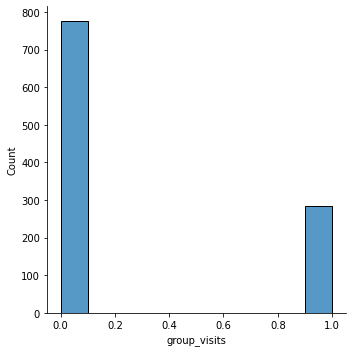

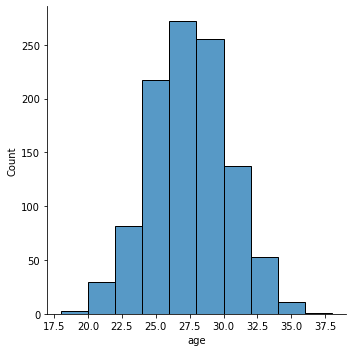

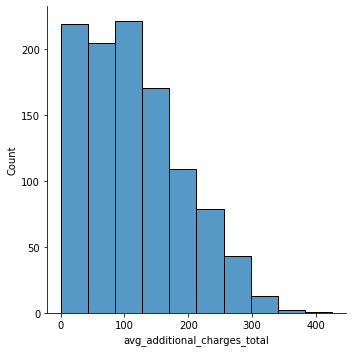

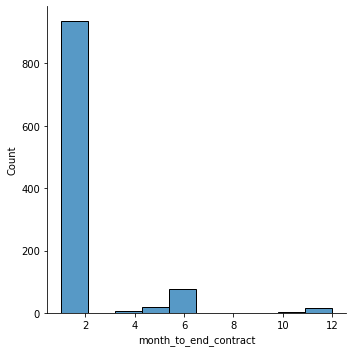

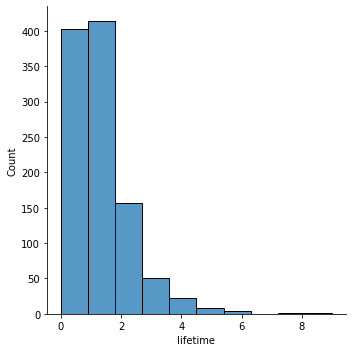

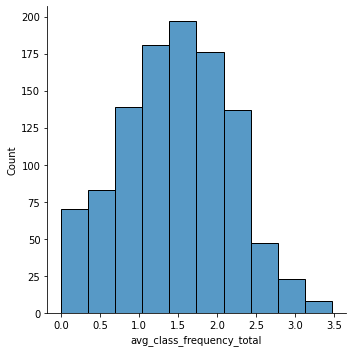

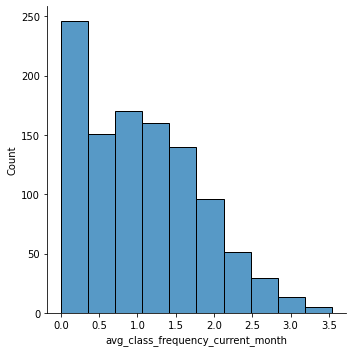

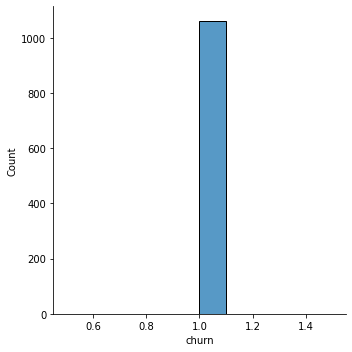

In [12]:
# feature histograms for negative user churn
for feature in negative_churn.columns:
    #plt.figure(figsize = (12,12))
    sns.displot(negative_churn[feature], bins = 10)
    plt.show()

For the customers who stayed, close to 600 were females(1) and a little over 500 were males(0). About 800 of the members reside close to the gym. Majority visited with partners and got in through friend promotions, many also had group visits. The popular contract period is 1 month. Majority did not apply with a phone number. Most members are aged between 27 and 28. Most visited once weekly though more people have no visits recorded for the current month.

In [13]:
# correlation matrix of dataset
gym_data.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


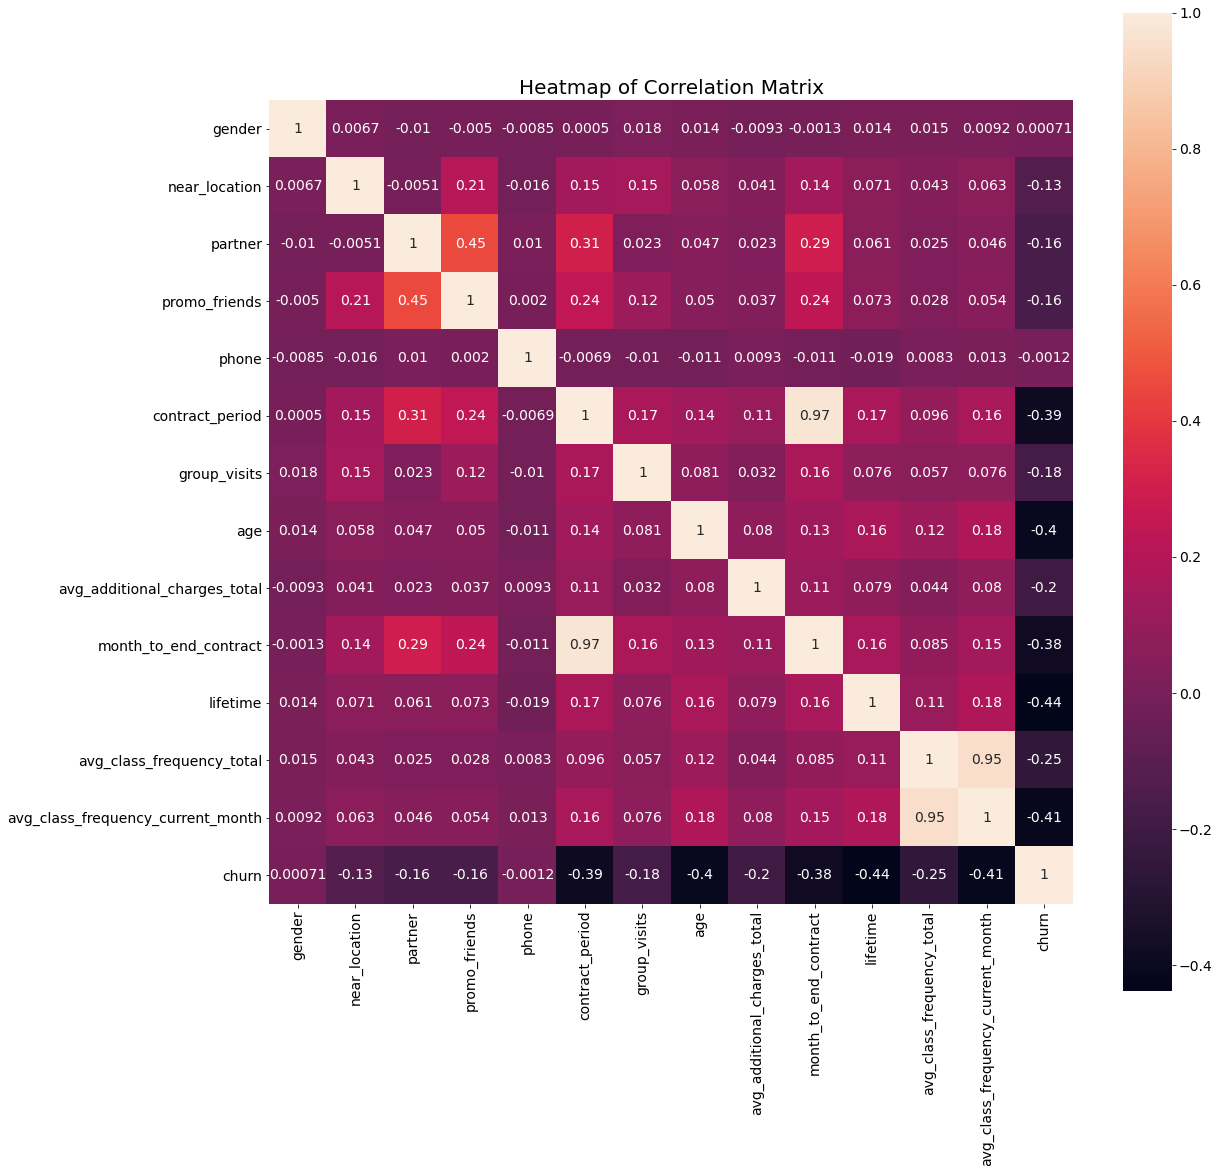

In [14]:
# heatmap of general correlation matrix
plt.figure(figsize = (18,18))
plt.rc('font', size = 14)
sns.heatmap(gym_data.corr(), annot = True, square=True)
plt.title('Heatmap of Correlation Matrix', size = 20)
plt.show()

The heatmap of the dataset's correlation matrix shows relatively strong correlation between columns `'average_class_frequency_total'` and `'average_class_frequency_current_month'`, `'contract_period'` and `'month_to_end_contract'`, and `'partner'` and `'promo_friends'`.

There is a very low positive correlation between gender and churn though its value is very close to 0. This shows that there is no significant or apparent correlation between churn and the other features represented in the dataset.

## Build Models to Predict User Churn

In [15]:
# dividing the data into features (the X matrix) and a target variable (y)
X = gym_data.drop('churn', axis=1)
y = gym_data['churn']

In [16]:
# dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Logistic Regression Model

In [17]:
# set the algorithm for your model
model = LogisticRegression(random_state=0)

In [18]:
# train your model
model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
# use the trained model to make forecasts
predictions = model.predict(X_test)

In [20]:
# print all the studied metrics
print('Logistic regression metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Logistic regression metrics
Accuracy: 0.92
Precision: 0.87
Recall: 0.81


### Random Forest Classifier Model

In [21]:
# model algorithm
tree_model = RandomForestClassifier(random_state=0)

In [22]:
# training the model
tree_model.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [23]:
# use the trained model to make forecasts
tree_predictions = tree_model.predict(X_test)

In [24]:
# print all the studied metrics
print('Random forest classifier metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, tree_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, tree_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, tree_predictions)))

Random forest classifier metrics
Accuracy: 0.92
Precision: 0.84
Recall: 0.82


Accuracy for both models are equal while precision is higher in the Logistic regression model compared to Random forest classifier model and Recall is slightly higher in Random forest classifier model compared to Logistic regression model.
The model with the best results is Random forest classifier as its recall score is higher.

## Create User Clusters using Kmeans

In [25]:
# size of dataframe
gym_data.shape

(4000, 14)

In [26]:
# standardize the data
sc = StandardScaler()
x_sc = sc.fit_transform(gym_data)

In [27]:
# build matrices
linked = linkage(x_sc, method = 'ward')

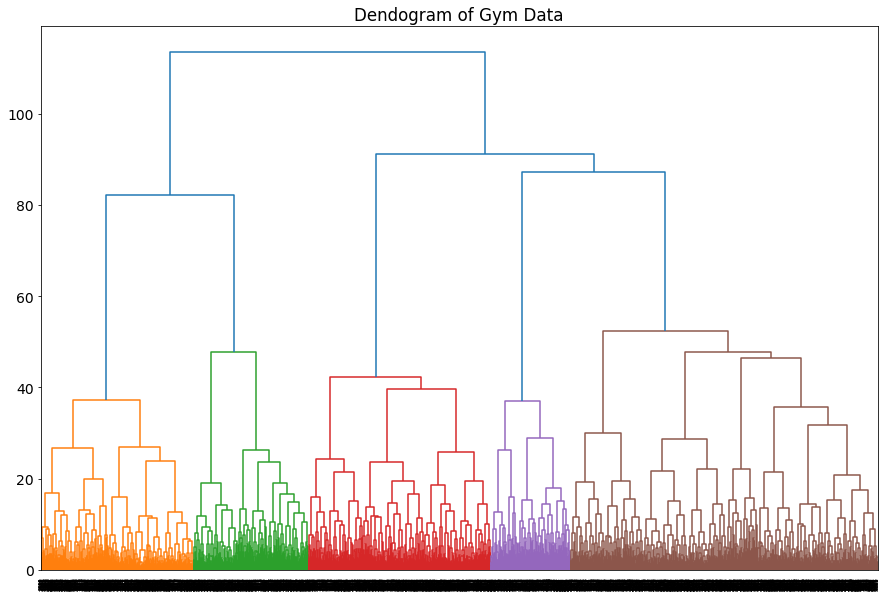

In [28]:
# plot dendogram of clusters
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation ='top')
plt.title('Dendogram of Gym Data')
plt.show()


The graph above shows there are 5 clusters represented by the different colored plots.

In [29]:
# define the k_means model with 5 clusters
km = KMeans(n_clusters = 5, random_state = 0)

In [30]:
# predict the clusters for observations
labels = km.fit_predict(x_sc)

In [31]:
# store cluster labels into the field of our dataset
gym_data['cluster_km'] = labels

In [32]:
# get the statistics of the mean feature values per cluster
gym_data.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.503676,0.000000,0.459559,0.075368,0.917279,2.069853,0.211397,28.522059,132.741216,1.950368,2.757353,1.706629,1.515890,0.450368
1,0.492829,0.936115,0.764016,0.534550,0.919166,10.447197,0.516297,29.962190,161.853561,9.477184,4.833116,2.788103,2.786919,0.007823
2,0.507917,1.000000,0.323995,0.213155,0.903776,1.546894,0.287454,26.926918,113.173051,1.500609,1.031669,1.449720,1.037592,0.961023
3,0.521186,0.996610,0.282203,0.208475,0.904237,1.882203,0.452542,30.237288,157.988625,1.794915,4.923729,2.203432,2.207359,0.003390
4,0.518895,0.968023,0.744186,0.526163,0.873547,8.859012,0.534884,29.728198,162.907495,8.155523,4.411337,0.957744,0.943967,0.024709


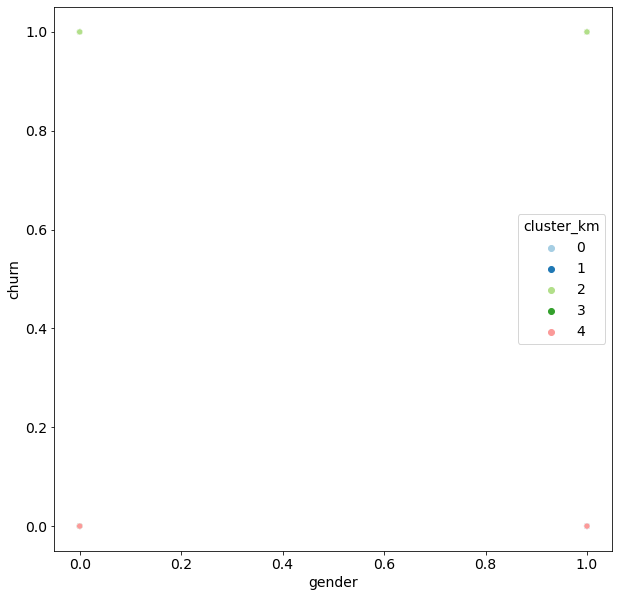

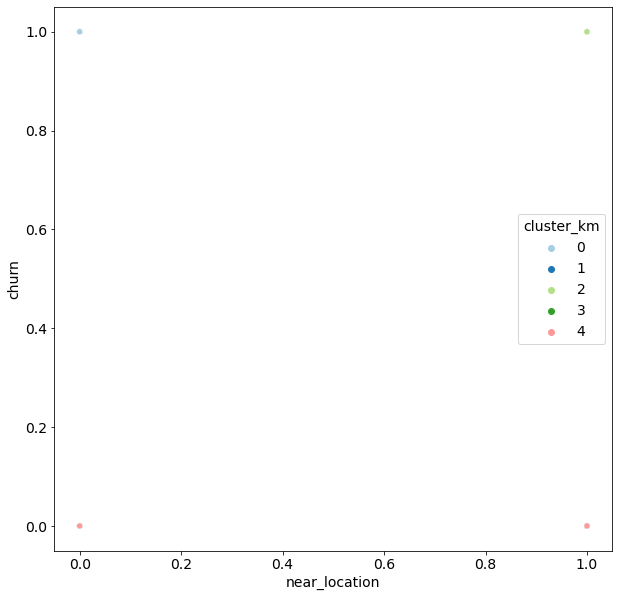

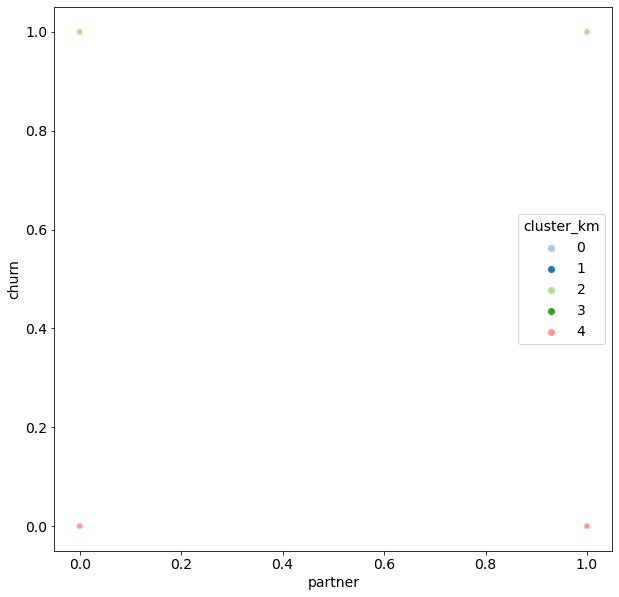

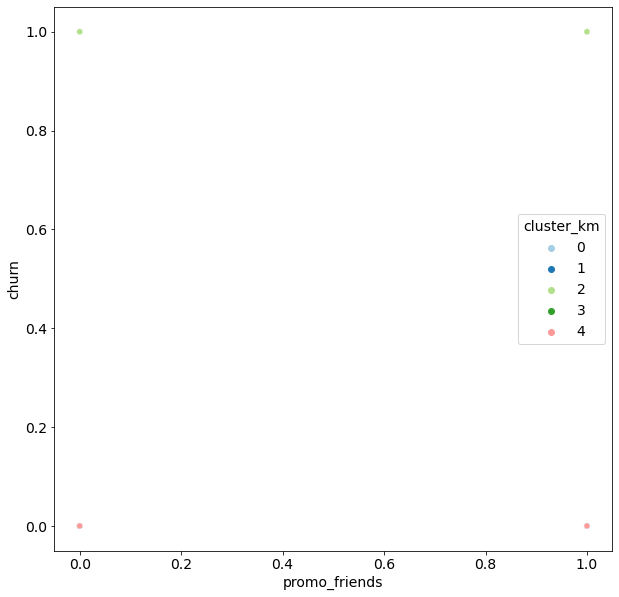

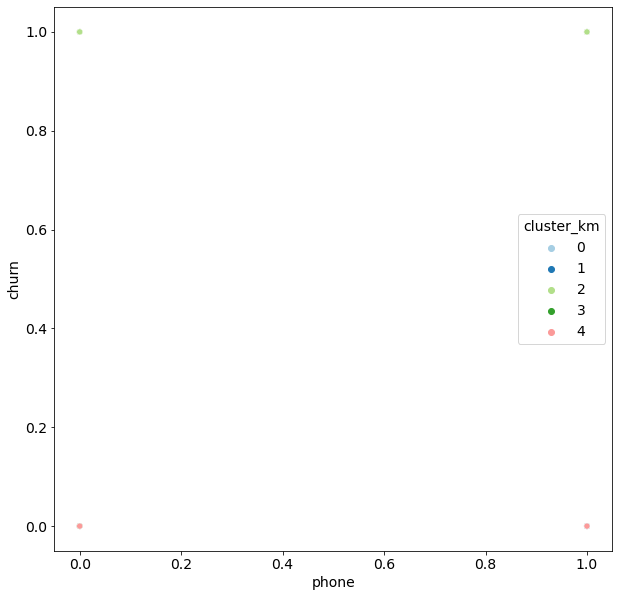

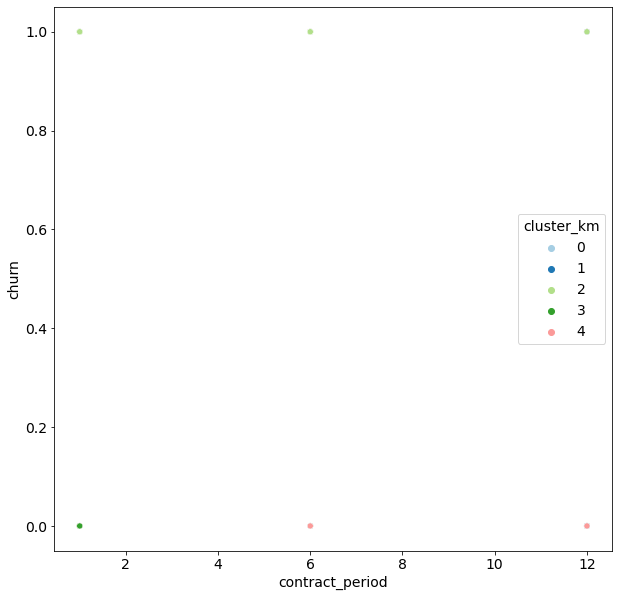

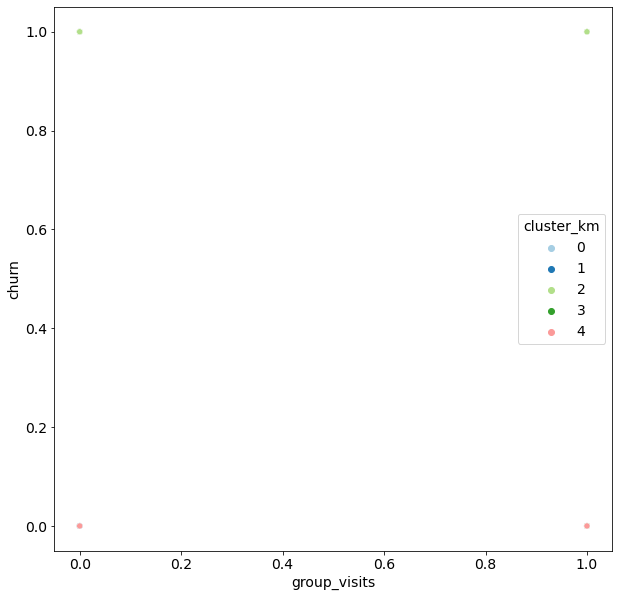

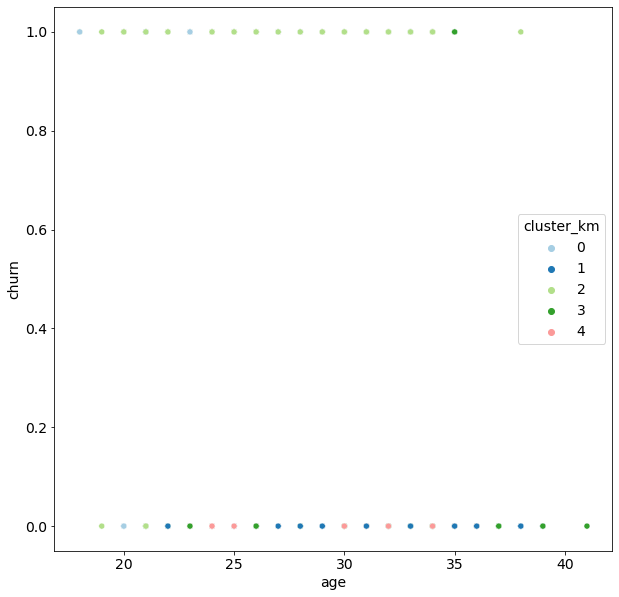

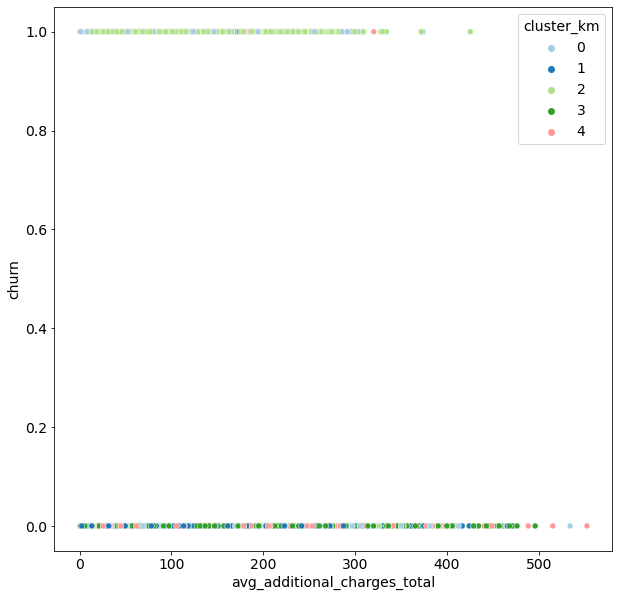

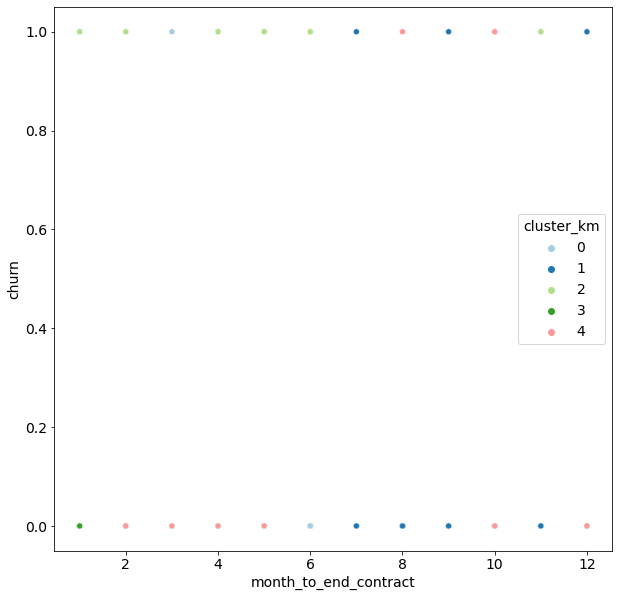

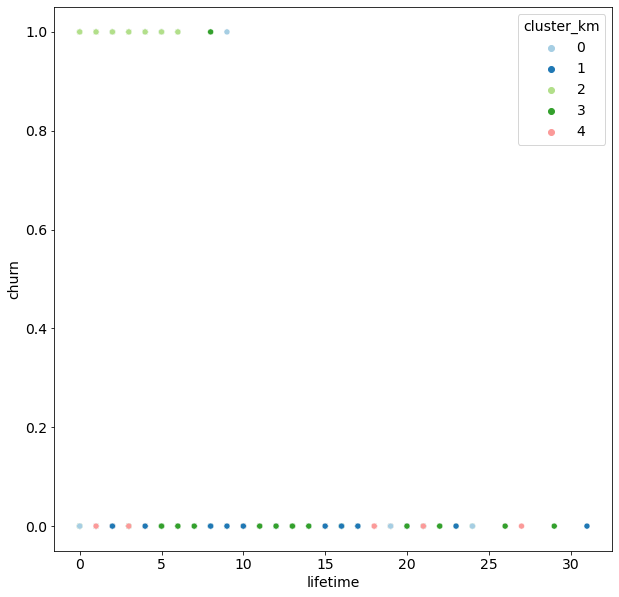

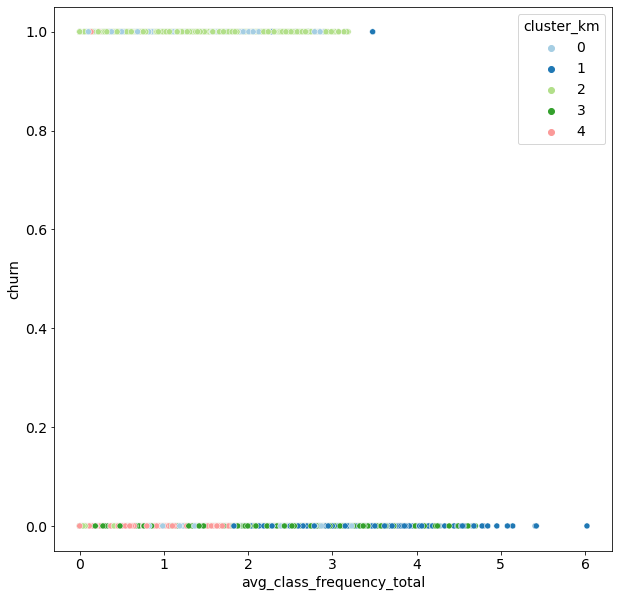

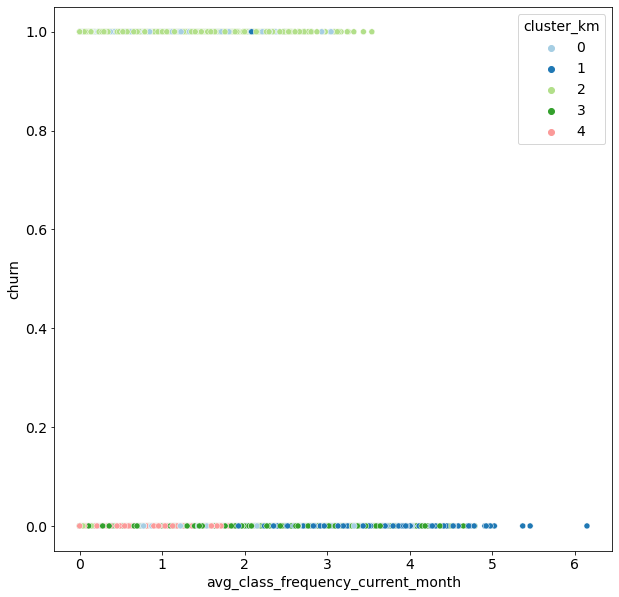

In [33]:
# distributions of features for the clusters
for col in gym_data.drop(['churn','cluster_km'], axis=1).columns:
    plt.figure(figsize = (10, 10))
    sns.scatterplot(x = gym_data[col], y = gym_data['churn'], hue = gym_data['cluster_km'], palette = 'Paired')
    plt.show()

In [34]:
# calculate churn rate for each cluster
gym_data.groupby('cluster_km')['churn'].mean()

cluster_km
0    0.450368
1    0.007823
2    0.961023
3    0.003390
4    0.024709
Name: churn, dtype: float64

The churn rate for cluster 2 is closer to 1 which indicates that customers in cluster 4 are more likely to stay compared to cluster 1 and especially cluster 3 with churn rates close to 0, which indicates that these customers are more likely to leave the gym. 

Thus, cluster 3 is prone to leaving and cluster 2 is loyal to the gym.

## General Conclusions

The churn rate based on the analysis of the dataset is about 75% of the dataset. Customers in this group had a mean age of ~30. The average contract period is ~6 months with the average total time spent at the gym noted as ~5 months. These members visited the gym twice weekly on average. The average customer had 5 months left on their contract by the time they left.
Majority were female and most members reside close to the gym. Majority did not have visit with partners though many got in through friend promotions.

For the negative churn data, slightly over a 1000 members stayed loyal to the gym out of the total 4000 in the dataset. The avergae age of cutomers in this group is ~27. The average contract period is 1 month with the average total time spent at the gym noted as ~1 month. The members visit the gym mostly once weekly on average. The average customer has ~2 months left on their contract.
Of the 1000 customers who stayed, close to 600 were females and about 800 members reside close to the gym. Majority visited with partners and got in through friend promotions, many also had group visits. The popular contract period is 1 month. Majority of the members still with the gym have no visits recorded for the current month.

The correlation matrix shows relatively strong correlation between columns 'average_class_frequency_total' and 'average_class_frequency_current_month', 'contract_period' and 'month_to_end_contract', and 'partner' and 'promo_friends'. There is a very low positive correlation between gender and churn though its value is very close to 0. This shows that there is no significant or apparent correlation between churn and the other features represented in the dataset.

For Logistic Regression Model and Random Forest Classifier Model, accuracy is equal while precision is higher in the Logistic regression model compared to Random forest classifier model and recall is slightly higher in Random forest classifier model compared to Logistic regression model. The model with the best results is Random forest classifier as its recall score which denotes actual positive values in the predictions is higher.

Based on the dendograph, there are 5 clusters represented in the dataset.
The churn rate for cluster 2 is closer to 1 which indicates that customers in cluster 4 are more likely to stay compared to cluster 3 with churn rates close to 0, which indicates that these customers are more likely to leave the gym. Thus, cluster 3 is prone to leaving and cluster 2 is loyal to the gym.

Based on our analysis, the target group of customers are those in their late 20s, primarily females. Most with partners or group visits to the gym. Thus, having more promotions or incentives garnered towards referring others to join the gym would be beneficial to growing and retaining customers. 
Having a trial period of the 1st month free could also help against churn as many members who left the gym still had contracts up to 5 months remaining.
Per our data, members who left the gym went twice weekly on average, compared to those who stayed, which averages once per week. The data also shows that those who stayed have hardly visited the gym this current month. With such statistics, the probablility of more members leaving is quite high. So, encouraging cutomers to gym at least twice weekly by holding classes or specialized training sessions could be beneficial for retention.